# 0. 복습

## 추천 시스템

1. **내용 기반 필터링**: 콘텐츠의 유사도를 기반으로 사용자에게 추천/ 사용자가 이용/선택한 아이템과 ‘유사한 아이템’을 추천
2. **협업 필터링**: 서비스 내에 있는 **다수의 사용자로부터 얻은 선호도 정보**를 기반으로 사용자에게 추천
3. **하이브리드 필터링**: 2가지 이상의 추천시스템 알고리즘을 조합

## 협업 필터링의 구현 방식

1. 기억 기반: user-item 행렬을 기반으로 유사도를 계산
    1. 사용자 기반 협업 필터링: 나와 비슷한 취향의 사용자 찾기
        1. 사용자가 늘어날수록 계산량이 늘어남
        2. 사용자 취향이 다양하여 정확히 찾기 어려움
    2. 아이템 기반 협업 필터링: 함께 선호되는 아이템 찾기
        1. 사용자 기반 대비 비교적 안정적
    3. 기억 기반 협업 필터링의 한계: 데이터 희소성 / 확장성 / 콜드 스타트
2. 모델 기반: 사용자 기반 협업 필터링의 한계를 극복하기 위해 등장. 평점 데이터에서 잠재 요인을 학습해 비어있는 평점을 예측

# 1. 인트로 - 모델 기반

## 잠재 요인과 행렬 분해

- 잠재 요인 : 사용자의 취향이나 아이템의 특성을 설명하는 숨겨진 차원
    - 사람이 직접 이해 불가.
- 행렬 분해: `user-item 평점 행렬` 과 `취향 벡터`의 **내적**으로 표현
- 행렬 분해의 수행 방식
    - SVD(수학적 분해 기법): 행렬 분해를 사용. 희소 행렬의 경우 결측치 처리가 필요함
        - $A = U\sum{}V^T$
        - 결측치 처리 → SVD 수행 → 차원 축소 → 잠재 요인 추출
    - SGD(최적화 알고리즘): 경사 하강법 기반, 희소성 문제를 우회적으로 해결함
        - 초기화 → 반복 학습 → 오차 계산 → 잠재 벡터 업데이트
    - NMF(제약 조건 기반 모델): 비음수 제약 조건을 추가해 해석력을 높임
        - 초기화 → 최적화 → 결과
    - PMF(확률적 모델): 불확실성을 모델링
        - 누가 무엇을 좋아할지 예측하는 모델
        - 베이지안 추론 기법과 결합 시 더 정교한 추천 모델이 됨

# 2. 최근 추천시스템의 방향성

## VAE 기반 협업 필터링

- input(사용자의 아이템 상호작용 벡터)를 받아 잠재 공간에서 재구성함
    - VAE = 디코더 중심!
- 장점: 확률적 잠재 분포로 사용자 선호를 모델링할 수 있음 → 불확실성을 반영함 / 희소 데이터에도 강건함

### MF의 한계와 딥러닝의 등장

- 행렬 분해를 통해 희소성 문제를 일부 해결하더라도 한계가 있음.
    - 선형성의 한계: 평점 예측이 단순 내적으로만 이루어짐
        - 딥러닝에서 비선형 활성화 함수로 해소, 복잡한 패턴을 학습
    - 불확실성 무시: 사용자 취향이 하나의 벡터값으로만 표현됨
        - 딥러닝에서는 확률 분포로 취향을 모델링 → 데이터의 불확실성을 반영함

→ 이 문제를 해결하는 모델이 VAE임!

### 왜 오토인코더가 아닌 VAE인가?

⇒ VAE가 불확실성을 모델링하여 희소성을 해결하기 때문!

- If AE: “사용자 A의 취향은 (벡터값)일 것이다” 라고 **단일 값 추정**!
    - 데이터 부족 상황에서는 추정치가 불안정하여 노이즈에 취약
- If VAE: “A의 취향은 (평균, 표준편차)를 따르는 분포일 것이다” 라고 **분포 추정**!
    - 불확실성(오차 범위)를 모델링에 포함시킴으로서 안정성을 높임

### VAE 기반 CF의 작동 구조

입력 → 인코더 → 잠재 벡터 → 디코더

### 목적 함수와 KL Divergence

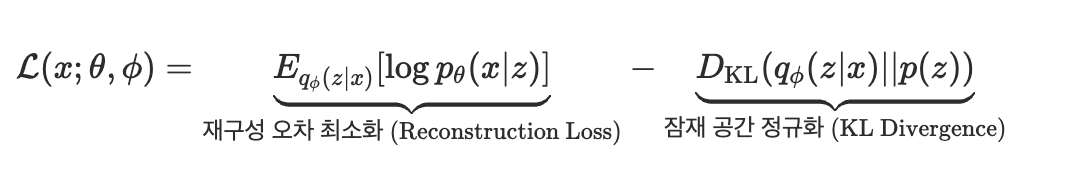

- 첫번째 항 = 재구성 오차 최소화
    - 디코더가 잠재 벡터 z를 사용하여 원래 입력 x를 최대한 비슷하게 복원하도록 함!
- 두번째 항 = 잠재 공간 정규화
    - 인코더가 출력하는 잠재 분포와 사전 분포와 유사하도록 강제함

## GNN 기반 사용자 선호 예측

GNN = Graphical Neural Network

- 관계, 순서 같은 정보를 활용하지 못함 → 관계를 모델링하려면 GNN을 사용
- GNN = 그래프 신경망.
    - 노드와 선(edge)로 구성 - 관계, 상호작용을 그림으로 그리듯 모델링!

### GNN의 구조

그래프 구조 생성 → 메시지 패싱 (메시지 생성-집계-갱신) → 최종 출력

- 메시지 생성 : 이웃에게 보내는 자신의 임베딩 생성
- 집계: 이웃 노드에서 받은 메시지를 하나의 벡터로 통합
- 갱신: 이웃 정보와 자신의 이전 상태를 결합, 새로운 임베딩을 계산

→ 이웃 노드의 정보를 나에게 전달/요약하는 것

### LightGCN

GNN의 한 종류로, 추천 시스템에 특화된 GNN

- 특징 변환: 레이어마다 복잡한 학습 파라미터를 삭제
- 비선형 활성화 함수 제거: relu 사용 X, 이웃 정보를 정규화된 합/평균 사용

### GNN 활용 사례

- 핀터레스트: 30억개의 노드와 180억개의 엣지로 구성
- 그 외에도 다양한 분야에 사용 - 화학, 생명과학, 금융, 보안, 프로그램 분석 등

### GNN의 장단점

**[장점]**

- 고차원 협업 시그널 포착: 나와 연관된 다른 아이템들의 정보를 직접 반복해서 반영 가능
- 정형화되지 않은 데이터 학습 가능: 관계를 학습하므로 정형화된 데이터가 아니어도 됨
- 콜드 스타트 문제 완화: 노트의 고유 특징 + 이웃과의 관계를 활용해 바로 임베딩 생성 가능

**[단점]**

- 과평탄화: 모든 노드의 임베딩이 같은 값으로 수렴. 메시지 전달을 너무 많이 한 결과
- 과압축: 층이 깊어질수록 범위가 거쳐, 고정된 크기의 벡터에 압축하려면 정보가 손실됨
- 계산 복잡도
- 해석의 어려움

## 3. Transformer 기반 추천 시스템

### 기존 추천 시스템의 순차적 한계

이전 모델들은 순차 정보를 다루는 데에 한계가 존재함

- CF: [신발 -> 바지 -> 셔츠] 순서 구매자와 [셔츠 -> 바지 -> 신발] 구매자를 동일하게 간주
- GNN: 지역적 정보 전파의 한계, 장기 의존성 문제

### 사용자 행동을 순서로 접근

→ 시퀀스 내의 문맥과 핵심 의도를 파악함

- Self Attention - 문맥에 따라 동일 아이템의 의미가 달라짐
    - 어떤 문맥에서 상품이 등장했는지 파악하여 순서에 따라 사용자의 의도를 분리해낼 수 있음
- Long-range Dependency - 멀리 떨어진 과거의 행동이 다음 행동의 키가 될 수 있다
    - ex. 오래 전 레이저 프린터 구매 → 오늘 토너 구매
    - 시간 순서, 거리에 얽매이지 않고 관련성이 높은 문맥(구매 기록 등)에 attention 함

### Transformer의 핵심 = Self-Attention

→ 시퀀스 내 모든 아이템 간의 관계를 거리에 상관없이 동시 계산하도록 함

- Q = ‘토너’와 관련된 정보는?
- K = 시퀀스 내 프린터, 가습기 등 특징을 표시하는 이름
- V = 프린터, 가습기 등이 담고 있는 실제 의미/특징

Q-K attention score을 계산 → 가중치 변환 → 가중치를 V와 가중평균

# 4. Transformer 기반 주요 추천 시스템 모델

## SASRec

→ Self-Attentive Sequential Recommendation

- 단방향 어텐션과 유사 (과거의 아이템 참조)
- 시퀀스 내의 정보를 참조해 다음에 올 아이템을 예측함
- 과거 정보를 활용해 다음 행동을 예측하는 구조
- 계산량 많음, 단방향성 문제

## BERT4Rec

- BERT = 양방향! 어텐션
- 시퀀스 일부를 mask로 가리고 과거 + 미래의 아이템을 참조해 mask 에 가려진 아이템을 예측함
- 과거와 미래 모두를 고려함
- 시퀀스 전체의 선호도를 파악하는 데 초점이 맞추어져 있음.

## 진짜 최신 트렌드 : LLM

→ 추천은 더이상 랭킹이 아닌 언어 문제

- 대화형 추천: 사용자의 자연어 요청을 직접 이해하고 추천
- zero-shot 추천: 새로운 아이템이더라도 해당 아이템의 설명만으로 그럴싸한 추천 제공

## 현업의 고민: 책임감 있는 AI

- 인기 편향: 인기 있는 아이템만 추천되는 문제
- 설명가능성: XAI, 블랙박스 문제
- 비용 문제: 딥러닝 추천 모델을 전면 도입하기에 비용 ↑
    - GPU 사용, 연산량 폭발
    - 실시간 스코어링으로 인한 막대한 서버 비용
    - 대규모 트래픽 서비스에서 지속 불가

`선형 모델`은 빠르고 안정적, 해석이 용이함 ↔ `딥러닝/LLM 모델`은 강력하지만 무겁고 복잡함

→ 두 가지를 섞어서 활용!

- 후보군 생성: 선형 모델을 이용해 사용자가 좋아할 만한 아이템을 빠르게 골라내기
- 순위 매기기: 후보군을 대상으로 사용자가 좋아할 순서대로 정교하게 순위 매기기